In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

import matplotlib.pyplot as plt



In [2]:
# Set dataset paths
train_path = r"C:/Users/rohit sharma/rohit sharma_2315001880/Hindi/Train"
test_path = r"C:/Users/rohit sharma/rohit sharma_2315001880/Hindi/Test"

In [3]:
# Load Devanagari dataset from directories
batch_size = 32
img_size = (32, 32)

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_path,
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 78200 files belonging to 46 classes.


In [5]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_path,
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)


Found 13800 files belonging to 46 classes.


In [6]:
# Get class names and number of classes before prefetch
class_names = train_ds.class_names
num_classes = len(class_names)


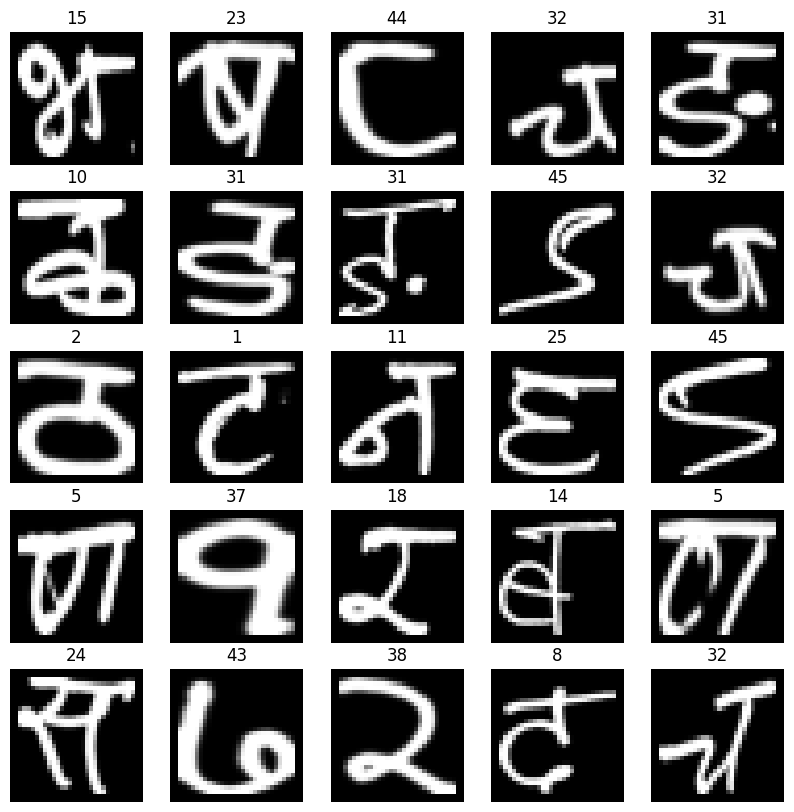

In [7]:
# Visualize the first 25 images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())
        plt.axis("off")
plt.show()

In [8]:
# Prefetch datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [9]:
# Set input shape
input_shape = (32, 32, 3)

In [10]:
# Build the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Rescaling(1. / 255),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)


In [11]:
# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,360,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        47,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,795,886 (10.67 MB)

 Trainable params: 2,795,886 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds
)


Epoch 1/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 482s 196ms/step - accuracy: 0.5631 - loss: 1.6260 - val_accuracy: 0.9377 - val_loss: 0.2025
Epoch 2/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 469s 192ms/step - accuracy: 0.9266 - loss: 0.2421 - val_accuracy: 0.9713 - val_loss: 0.0962
Epoch 3/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 474s 194ms/step - accuracy: 0.9574 - loss: 0.1366 - val_accuracy: 0.9779 - val_loss: 0.0731
Epoch 4/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 436s 173ms/step - accuracy: 0.9707 - loss: 0.0926 - val_accuracy: 0.9811 - val_loss: 0.0615
Epoch 5/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 155s 64ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9857 - val_loss: 0.0519
Epoch 6/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 385s 139ms/step - accuracy: 0.9821 - loss: 0.0544 - val_accuracy: 0.9838 - val_loss: 0.0544
Epoch 7/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 324s 132ms/step - accuracy: 0.9869 - loss: 0.0404 - val_accuracy: 0.9849 - val_loss: 0.0508
Epoch 8/20
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 160s 66ms/step - accu

In [14]:
# Evaluate the model
model.evaluate(test_ds)


432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9899 - loss: 0.0409 


[0.04030004143714905, 0.9905797243118286]

In [15]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

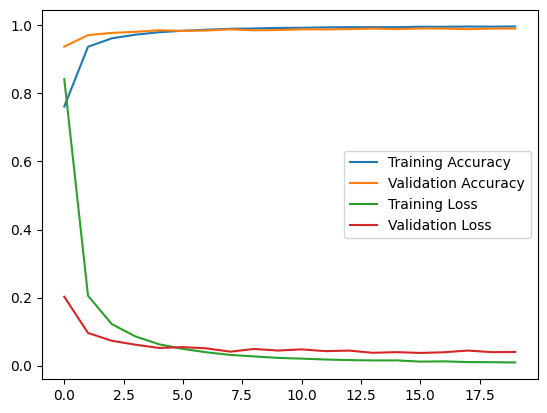

In [16]:
# Plot training and validation accuracy/loss
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()